In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows
pd.options.display.max_columns=30

In [2]:
dataFrame = pd.read_csv('/home/karthik/Documents/Dataset/Automobile_data.csv')
data = dataFrame.copy()
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
data['normalized-losses'].replace('?', np.nan, inplace=True)

In [4]:
data['normalized-losses'] = pd.to_numeric(data['normalized-losses'], errors='coerce')

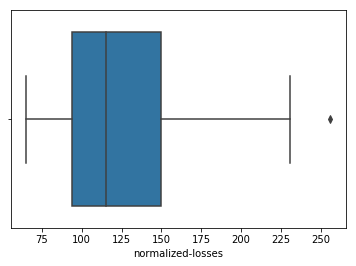

In [5]:
sns.boxplot(x=data["normalized-losses"])

In [6]:
data['normalized-losses'].fillna((data['normalized-losses'].mean()), inplace=True)

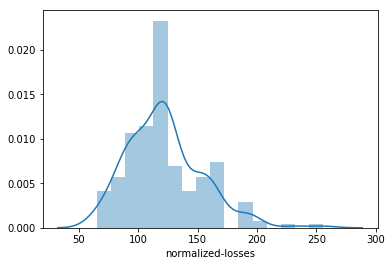

In [7]:
sns.distplot(data['normalized-losses'])

In [8]:
data['make'].nunique()

22

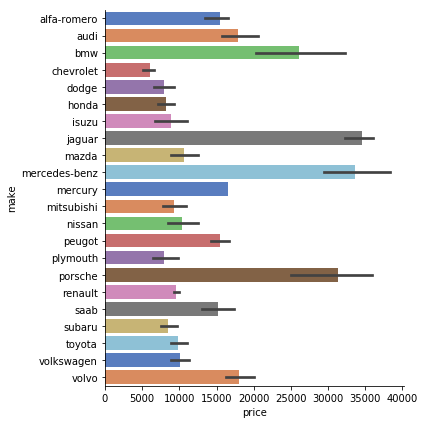

In [12]:
data['price'] = pd.to_numeric(data['price'], errors='coerce')
sns.catplot(x="price", y="make", data=data,
                height=6, kind="bar", palette="muted")

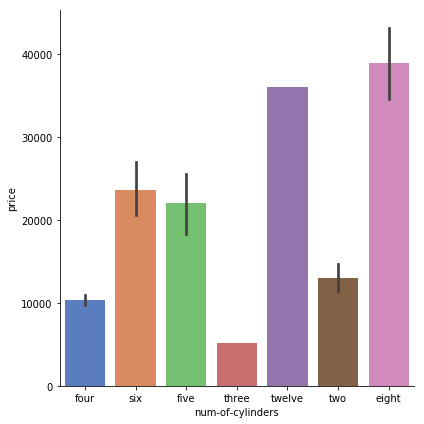

In [10]:
sns.catplot(x="num-of-cylinders", y="price", data=data,
                height=6, kind="bar", palette="muted")

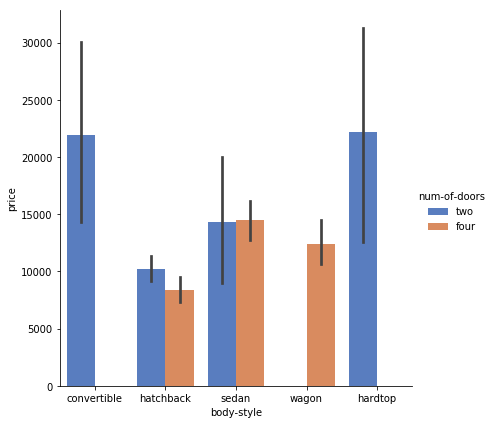

In [28]:
sns.catplot(x="body-style", y="price", hue="num-of-doors", data=data,
                height=6, kind="bar", palette="muted")

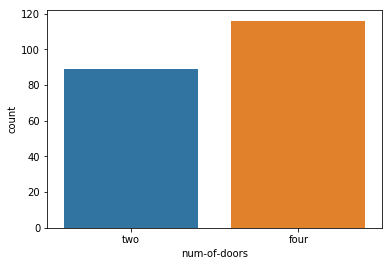

In [27]:
sns.countplot(x="num-of-doors", data=data)

In [26]:
data['num-of-doors'].replace('?', "four", inplace=True)

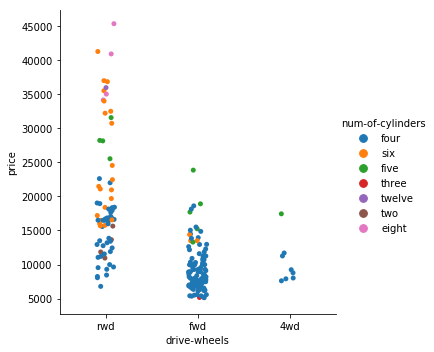

In [32]:
sns.catplot(x="drive-wheels", y="price", hue="num-of-cylinders",  data=data)

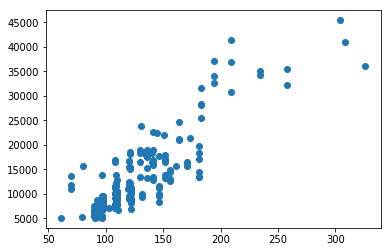

In [34]:
plt.scatter(data['engine-size'],data['price'])

In [41]:
data['horsepower'].replace('?', np.nan, inplace=True)

In [42]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

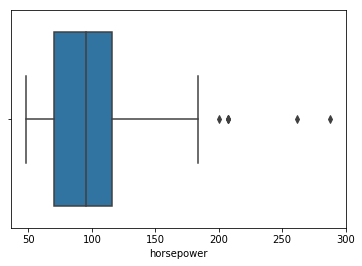

In [43]:
sns.boxplot(x=data["horsepower"])

In [44]:
data['horsepower'].fillna((data['horsepower'].mean()), inplace=True)

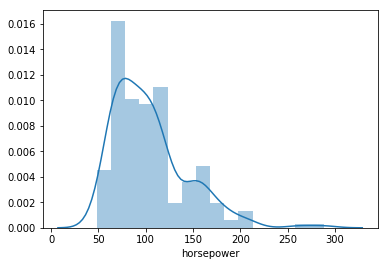

In [45]:
sns.distplot(data['horsepower'])s

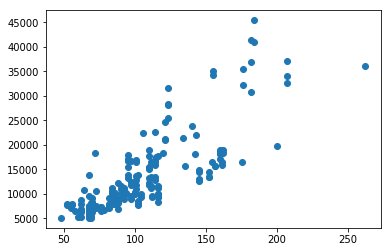

In [46]:
plt.scatter(data['horsepower'],data['price'])

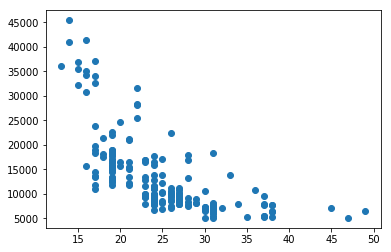

In [49]:
plt.scatter(data['city-mpg'],data['price'])

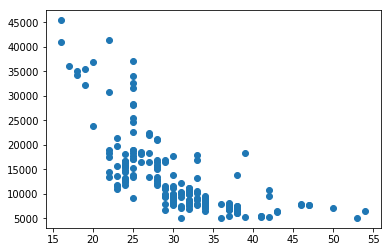

In [54]:
plt.scatter(data['highway-mpg'],data['price'])

In [55]:
data['peak-rpm'].replace('?', np.nan, inplace=True)

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [56]:
data['peak-rpm'] = pd.to_numeric(data['peak-rpm'], errors='coerce')

In [57]:
data['peak-rpm'].unique()

array([5000., 5500., 5800., 4250., 5400., 5100., 4800., 6000., 4750.,
       4650., 4200., 4350., 4500., 5200., 4150., 5600., 5900., 5750.,
         nan, 5250., 4900., 4400., 6600., 5300.])

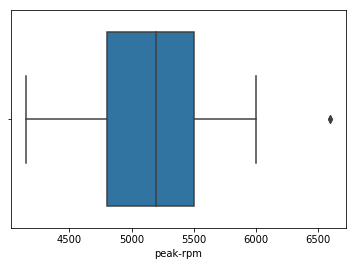

In [58]:
sns.boxplot(x=data['peak-rpm'])

In [59]:
data['peak-rpm'].fillna((data['peak-rpm'].mean()), inplace=True)

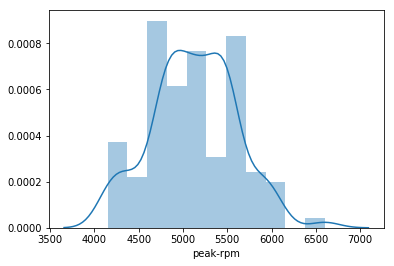

In [61]:
sns.distplot(data['peak-rpm'])

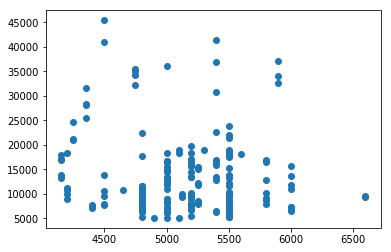

In [62]:
plt.scatter(data['peak-rpm'],data['price'])

In [115]:
data['price'].replace('nan', np.nan, inplace=True)

In [116]:
data['price'] = data['price'].dropna()

## Below are the three feature probably dependent
#### Horsepower, CityMpG, HighwayMpG

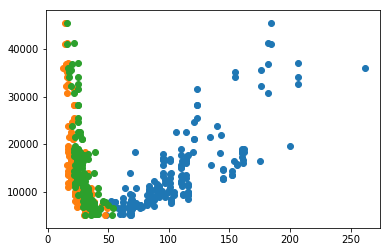

In [63]:
plt.scatter(data['horsepower'],data['price'])
plt.scatter(data['city-mpg'],data['price'])
plt.scatter(data['highway-mpg'],data['price'])

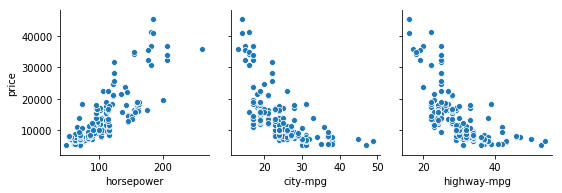

In [64]:
sns.pairplot(data, x_vars=["horsepower", "city-mpg", "highway-mpg"], y_vars=["price"])

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data.iloc[:, 21:22].values
y = data.iloc[:, 25].values

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [127]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

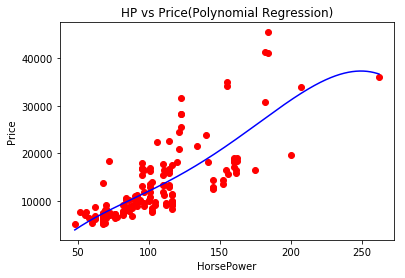

In [130]:
X_grid = np.arange(min(X_train), max(X_train), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('HP vs Price(Polynomial Regression)')
plt.xlabel('HorsePower')
plt.ylabel('Price')
plt.show()

In [134]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 = ",r2_score(y_test, y_pred))

MSE =  14225609.116360966
R2 =  0.8122534733937337


In [131]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

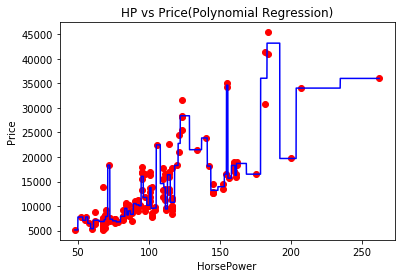

In [132]:
X_grid = np.arange(min(X_train), max(X_train), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('HP vs Price(Polynomial Regression)')
plt.xlabel('HorsePower')
plt.ylabel('Price')
plt.show()

In [135]:
y_pred = regressor.predict(X_test)
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 = ",r2_score(y_test, y_pred))

MSE =  19045485.275377456
R2 =  0.7486417854775411
